In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn import tree
from  sklearn.tree  import  DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/amzn_stock.csv', index_col='Date', parse_dates=True)
# Сделали нашу колонку Date индексом
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2017-07-11,993.00,995.99,983.72,994.13,2982726
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574
2017-07-13,1004.62,1006.88,995.90,1000.63,2880769


In [6]:
df['2010-02': '2011-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
...,...,...,...,...,...
2011-03-25,171.64,173.49,170.30,170.98,4294302
2011-03-28,171.80,172.50,169.25,169.35,3400936
2011-03-29,170.73,174.84,170.07,174.62,4887443


In [8]:
df.resample('3h').asfreq()
# Разобьёт данные на временные отрезки по 3 часа

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.90,7600543.0
2010-01-04 03:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 09:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 12:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-07-16 12:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 15:00:00,NaN,NaN,NaN,NaN,NaN
2017-07-16 18:00:00,NaN,NaN,NaN,NaN,NaN


In [13]:
df.resample('1w').mean()
# Разобьёт данные на временные отрезки по 1 неделе и покажет среднее

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [16]:
df.rolling(5).mean()
# Это скользящее окно. Мы указываем сколько значений будет в этом окне (5), и оно считает
# по этому значению и 4 значениям перед ним переданную функцию. В данном случае среднее по 5 наблюдениям.

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,133.370,134.564,130.886,132.872,8900385.8
...,...,...,...,...,...
2017-07-11,974.748,984.988,970.126,981.180,3216989.8
2017-07-12,982.572,991.698,978.696,988.202,3208113.6
2017-07-13,990.564,998.194,986.072,995.300,3132344.8


In [18]:
df.rolling(5, min_periods=1).mean()
# Расчитает по всем наблюдениям. Если нету 5 наблюдений, то будет использоваться минимум 1 и т.д до 5

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.2500,136.610000,133.140,133.900000,7.600543e+06
2010-01-05,134.8400,136.045000,132.475,134.295000,8.228500e+06
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06
...,...,...,...,...,...
2017-07-11,974.7480,984.988000,970.126,981.180000,3.216990e+06
2017-07-12,982.5720,991.698000,978.696,988.202000,3.208114e+06
2017-07-13,990.5640,998.194000,986.072,995.300000,3.132345e+06


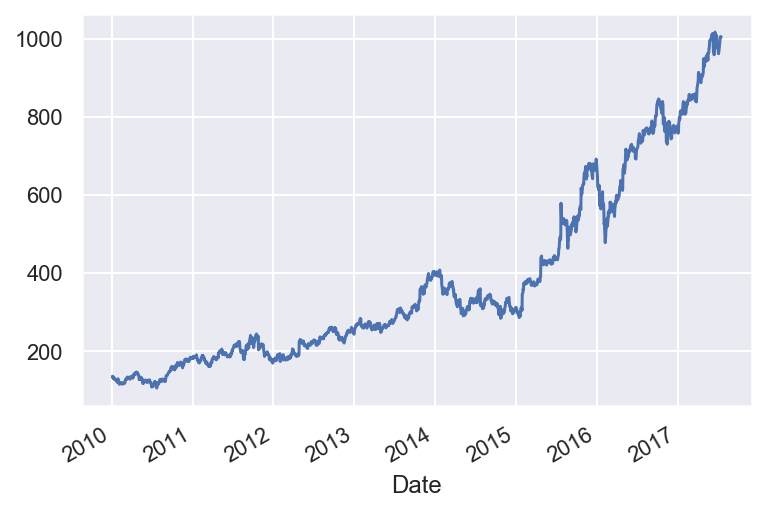

In [19]:
df['Open'].plot()

In [20]:
df.expanding().sum()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7.600543e+06
2010-01-05,269.68,272.09,264.95,268.59,1.645700e+07
2010-01-06,404.28,406.82,396.60,400.84,2.363798e+07
2010-01-07,536.29,539.14,525.40,530.84,3.466810e+07
2010-01-08,666.85,672.82,654.43,664.36,4.450193e+07
...,...,...,...,...,...
2017-07-11,712809.96,719868.39,705062.36,712892.68,8.578794e+09
2017-07-12,713810.61,720876.94,706060.46,713899.19,8.582402e+09
2017-07-13,714815.23,721883.82,707056.36,714899.82,8.585283e+09


In [23]:
df.index.weekday.value_counts()

2    390
1    389
3    382
4    380
0    355
Name: Date, dtype: int64

In [29]:
df.index.year

Int64Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=1896)

In [31]:
df.index.month_name()

Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July', 'July',
       'July'],
      dtype='object', name='Date', length=1896)

In [33]:
np.mean(df.index.dayofyear)

178.00632911392404

In [34]:
df.index.day.value_counts()

8     65
9     65
10    65
11    65
12    65
23    65
13    65
7     64
14    64
6     63
17    63
22    63
19    63
15    63
16    62
5     62
21    62
3     62
27    62
28    62
20    61
24    61
2     61
26    60
18    60
4     59
1     58
29    58
25    57
30    56
31    35
Name: Date, dtype: int64

In [35]:
df.shape

(1896, 5)

In [36]:
df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [37]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [38]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [41]:
df.size

9480